# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import os

from matplotlib import pyplot as plt

# Gather data

In [2]:
df_covid_19 = pd.read_csv("Dataset/covid_19_data.csv")
df_covid_19['Date'] = pd.to_datetime(df_covid_19['ObservationDate'])
df_covid_19['Outbreak'] = 'COVID_2019'
df_covid_19.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Date', 'Outbreak'],
      dtype='object')

In [3]:
df_sars_03 = pd.read_csv("Dataset/sars_2003_complete_dataset_clean.csv")
df_sars_03['Date'] = pd.to_datetime(df_sars_03['Date'])
df_sars_03['Province/State'] = None
df_sars_03['Outbreak'] = 'SARS_2003'
print(df_sars_03.columns)
df_sars_03.rename({'Cumulative number of case(s)':'Confirmed',
                   'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},
                  axis=1,inplace=True)

Index(['Date', 'Country', 'Cumulative number of case(s)', 'Number of deaths',
       'Number recovered', 'Province/State', 'Outbreak'],
      dtype='object')


In [4]:
templ_cols = ['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
df = pd.concat([df_covid_19[templ_cols], df_sars_03[templ_cols]])
df = df.reset_index(drop=True)

In [5]:
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Province/State'] = df['Province/State'].fillna('Others')
df = df.sort_values(['Country/Region','Province/State','Date'])

In [6]:
df = df.groupby(['Outbreak','Country/Region','Province/State','Date']).agg({'Confirmed':'sum'}).reset_index()
df['Province/State'] = 'all'

In [7]:
t = df.groupby(['Outbreak','Country/Region','Province/State']).agg({'Confirmed':'max'})
t = t.loc[t['Confirmed'] > 50]
df = pd.merge(df,t[[]],left_on=['Outbreak','Country/Region','Province/State'], right_index=True)

In [8]:
df['Country/Region'].value_counts()

Mainland China        2040
US                    1915
Canada                 419
Australia              364
France                 177
                      ... 
Kyrgyzstan              10
Kosovo                   9
Guadeloupe               9
Diamond Princess         3
West Bank and Gaza       2
Name: Country/Region, Length: 123, dtype: int64

In [9]:
country_data = pd.read_csv("Dataset/countries of the world.csv")
country_data['Country'] = country_data['Country'].str.strip()
country_data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [10]:
df.loc[df['Country/Region']=='US','Country/Region'] = 'United States'
df.loc[df['Country/Region']=='Mainland China','Country/Region'] = 'China'
df.loc[df['Country/Region']=='Viet Nam','Country/Region'] = 'Vietnam'
df.loc[df['Country/Region']=='UK','Country/Region'] = 'United Kingdom'
df.loc[df['Country/Region']=='South Korea','Country/Region'] = 'Korea, South'
df.loc[df['Country/Region']=='Taiwan, China','Country/Region'] = 'Taiwan'
df.loc[df['Country/Region']=='Hong Kong SAR, China','Country/Region'] = 'Hong Kong'

In [11]:
df = pd.merge(df, country_data, how='left', left_on=['Country/Region'], right_on=['Country'])
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.loc[df['Country'].isnull()]['Country/Region'].value_counts()

Others                    46
North Macedonia           31
Bosnia and Herzegovina    23
Ivory Coast               18
Congo (Kinshasa)          17
Trinidad and Tobago       14
Montenegro                11
Kosovo                     9
Diamond Princess           3
West Bank and Gaza         2
Name: Country/Region, dtype: int64

In [13]:
df.loc[df['Region'].isnull(), 'Region'] = 'Others'
df.loc[df['Country'].isnull(), 'Country'] = 'Undefined'

In [14]:
df['Country'].value_counts()

China            2135
United States    2009
Canada            419
Australia         364
France            177
                 ... 
Venezuela          14
Uzbekistan         13
Mauritius          10
Kyrgyzstan         10
Guadeloupe          9
Name: Country, Length: 109, dtype: int64

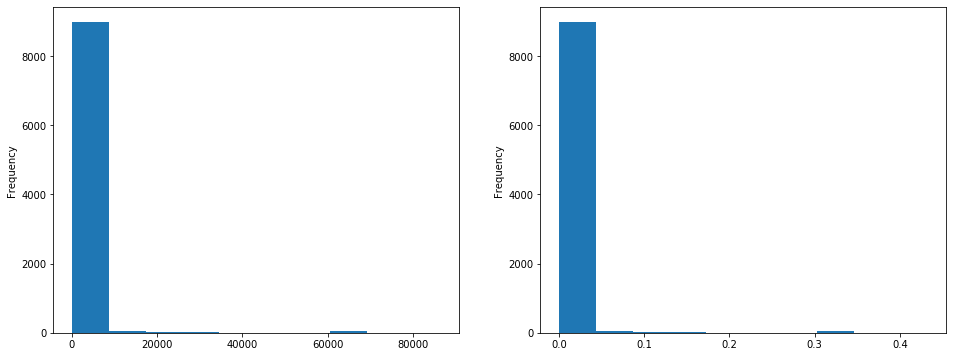

In [15]:
fix, ax = plt.subplots(figsize=(16,6), ncols=2)
s0 = df['Confirmed']
s0.plot.hist(ax=ax[0])

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler(feature_range=(0,1)).fit(np.asarray([0, 2E5]).reshape(-1,1))

s1 = pd.Series(transformer.transform(s0.values.reshape(-1,1)).reshape(-1))
s1.plot.hist(ax=ax[1])
df['Confirmed_transformed'] = s1

In [16]:
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

In [17]:
n_lags = 5
for k,v in df.groupby(['Outbreak','Country/Region','Province/State']):    
    for d in range(n_lags,0,-1):                
        df.loc[v.index, f'Confirmed_Lag_{d}'] = v['Confirmed'].shift(d)

        df.loc[v.index, f'Confirmed_Transformed_Lag_{d}'] = v['Confirmed_transformed'].shift(d)

X_mask_lags = [c for c in df.columns if 'Confirmed_Lag_' in c]
X_mask_lags_transformed = [c for c in df.columns if 'Confirmed_Transformed_Lag_' in c]

df[X_mask_lags] = df[X_mask_lags].fillna(0)
df[X_mask_lags_transformed] = df[X_mask_lags_transformed].fillna(0)

print(f'Dataframe shape {df.shape}')

Dataframe shape (9126, 38)


# Encoding data

In [18]:
from sklearn.preprocessing import LabelEncoder
enc_outb = LabelEncoder().fit(df['Outbreak'])
df['Outbreak_enc'] = enc_outb.transform(df['Outbreak'])

enc_ctry = LabelEncoder().fit(df['Country/Region'])
df['Country_enc'] = enc_ctry.transform(df['Country/Region'])

enc_region = LabelEncoder().fit(df['Region'])
df['Region_enc'] = enc_region.transform(df['Region'])

In [19]:
df.head()

,Outbreak,Country/Region,Province/State,Date,Confirmed,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),...,Confirmed_Transformed_Lag_4,Confirmed_Lag_3,Confirmed_Transformed_Lag_3,Confirmed_Lag_2,Confirmed_Transformed_Lag_2,Confirmed_Lag_1,Confirmed_Transformed_Lag_1,Outbreak_enc,Country_enc,Region_enc
0,COVID_2019,Afghanistan,all,2020-02-24,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0,0,0
1,COVID_2019,Afghanistan,all,2020-02-25,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000005,0,0,0
2,COVID_2019,Afghanistan,all,2020-02-26,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.000000,0.0,0.000000,1.0,0.000005,1.0,0.000005,0,0,0
3,COVID_2019,Afghanistan,all,2020-02-27,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.000000,1.0,0.000005,1.0,0.000005,1.0,0.000005,0,0,0
4,COVID_2019,Afghanistan,all,2020-02-28,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.000005,1.0,0.000005,1.0,0.000005,1.0,0.000005,0,0,0


# Creating a model

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, TimeDistributed, RepeatVector, Input, Concatenate, Flatten, Reshape, Embedding
from tensorflow.keras.backend import clear_session

In [22]:
from sklearn.model_selection import train_test_split

X_mask_cat = ['Outbreak_enc','Region_enc', 'Month','Week']
train_test = df.loc[df['Confirmed'] > 50].copy()
s_unique_values = train_test[X_mask_lags].apply(lambda r: len(np.unique(r.values)), axis=1)
train_test = train_test.loc[s_unique_values > 1].copy()
print(f'Train/Test shape {train_test.shape}')

train, valid = train_test_split(train_test, test_size=0.2, shuffle=True, random_state=231451)

Train/Test shape (3763, 41)


In [23]:
clear_session()

inp_outbreak = Input(shape=(1,1))
inp_country = Input(shape=(1,1))
inp_lags = Input(shape=(n_lags,1))


emb_outbreak = Embedding(input_dim=2, output_dim=1)(inp_outbreak)
emb_country = Embedding(input_dim=210, output_dim=2)(inp_country)

lstm1 = LSTM(64, activation='linear', return_sequences=True)(inp_lags)
lstm2 = LSTM(32, activation='linear', return_sequences=False)(lstm1)

concat1 = Reshape(target_shape=(1,3))(Concatenate(axis=3)([emb_outbreak, emb_country]))
concat2 = Concatenate(axis=1)([Flatten()(concat1), lstm2])
dense1 = Dense(32, activation='linear')(concat2)
dense2 = Dense(1, activation='linear')(dense1)

model_keras = Model(inputs=[inp_outbreak, inp_country, inp_lags], outputs=[dense2])
model_keras.compile(loss='mean_squared_error', optimizer='adam')
model_keras.summary()

def prepare_keras_input(data):
    lags = data[X_mask_lags_transformed].values.reshape(-1, 5, 1)
    y = data['Confirmed_transformed'].values.reshape(-1,1)    
    
    return [data['Outbreak_enc'].values.reshape(-1,1,1), 
            data['Country_enc'].values.reshape(-1,1,1), lags], y
    
train_X, train_y = prepare_keras_input(train)
model_keras.fit(train_X, train_y, validation_data=(prepare_keras_input(valid)), epochs=50, verbose=0)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 1)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1, 1)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 1, 1)      2           input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 1, 2)      420         input_2[0][0]                    
______________________________________________________________________________________________

In [31]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Belarus', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Chile', 'Colombia', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Diamond Princess', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guadeloupe', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Jordan',
       'Kazakhstan', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'China',
       'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Moldova',
       'Montenegro', 'Morocco', 'Netherlands', 'New 

In [41]:
from datetime import timedelta
from tensorflow import convert_to_tensor

pred_steps = 30

history = df.loc[(df['Outbreak']=='COVID_2019') & (df['Confirmed'] > 0) & (df['Country/Region']=='Italy')]
history0 = history.iloc[-1]

pred_cat_outbreak = convert_to_tensor(history0['Outbreak_enc'].reshape(-1,1,1), np.int32)
pred_cat_country = convert_to_tensor(history0['Country_enc'].reshape(-1,1,1), np.int32)

pred_lags = history0[X_mask_lags_transformed].values
y = history0['Confirmed_transformed']

#print('History 0: ', pred_lags)
pred_lags = np.roll(pred_lags, -1)
pred_lags[-1] = y

#print('Pred 0: ', pred_lags)
pred = np.zeros(pred_steps)

dt_rng = pd.date_range(start=history0['Date']+timedelta(days=1), 
                       end=history0['Date']+timedelta(days=pred_steps),freq='D').values
dt_rng = pd.to_datetime(dt_rng)
# Scale
for d in range(pred_steps):    
    y = model_keras.predict([pred_cat_outbreak, pred_cat_country, convert_to_tensor(pred_lags.reshape(-1,5,1), np.float32)])[0][0]
    #print(f'Pred body: {pred_lags}')
    print(f'Step {d}, predicted for {dt_rng[d].strftime("%Y-%m-%d")} is: {transformer.inverse_transform(y.reshape(-1,1)).reshape(-1)}')
          
    pred_lags = np.roll(pred_lags, -1)
    pred_lags[-1] = y    
    pred[d] = y
    
pred = transformer.inverse_transform(pred.reshape(-1,1)).reshape(-1)
preds_keras = pd.Series(data=pred, index=dt_rng, name='predicted')

Step 0, predicted for 2020-03-28 is: [88299.266]
Step 1, predicted for 2020-03-29 is: [88748.516]
Step 2, predicted for 2020-03-30 is: [87834.46]
Step 3, predicted for 2020-03-31 is: [86054.836]
Step 4, predicted for 2020-04-01 is: [83821.266]
Step 5, predicted for 2020-04-02 is: [81422.79]
Step 6, predicted for 2020-04-03 is: [79071.86]
Step 7, predicted for 2020-04-04 is: [76906.21]
Step 8, predicted for 2020-04-05 is: [75004.234]
Step 9, predicted for 2020-04-06 is: [73400.74]
Step 10, predicted for 2020-04-07 is: [72099.9]
Step 11, predicted for 2020-04-08 is: [71085.72]
Step 12, predicted for 2020-04-09 is: [70330.195]
Step 13, predicted for 2020-04-10 is: [69799.08]
Step 14, predicted for 2020-04-11 is: [69455.984]
Step 15, predicted for 2020-04-12 is: [69265.16]
Step 16, predicted for 2020-04-13 is: [69193.22]
Step 17, predicted for 2020-04-14 is: [69210.234]
Step 18, predicted for 2020-04-15 is: [69290.21]
Step 19, predicted for 2020-04-16 is: [69411.28]
Step 20, predicted for 

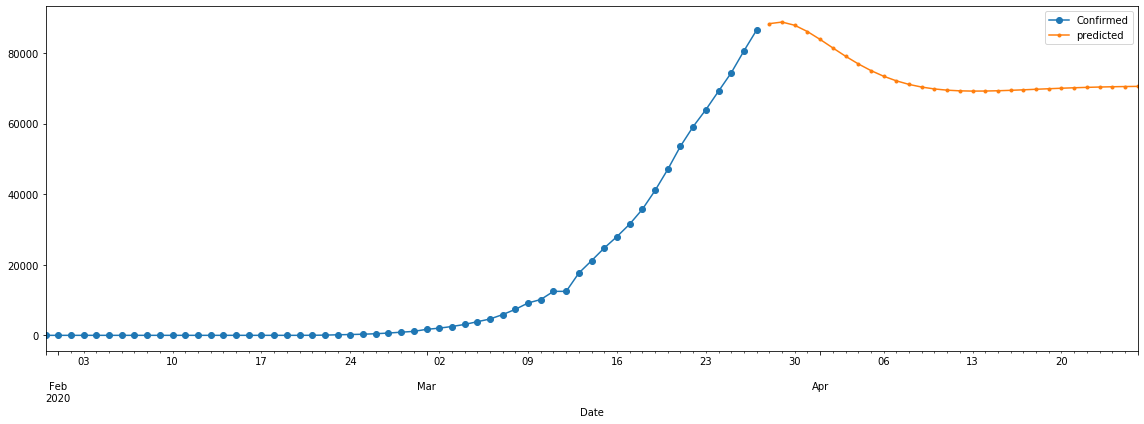

In [42]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(16,6))

hist = history.set_index(['Date'])['Confirmed'].plot(ax=ax, marker='o')
preds_keras.plot(ax=ax, marker='.')
plt.legend()
plt.tight_layout()